In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customer_analysis = pd.read_csv("customer_analysis.csv")
total_sales_per_product = pd.read_csv("product_sales.csv")

In [15]:
def plot_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()


### Top 3 Most Profitable Products

Top 3 Most Profitable Products:
     PROD_NBR  TOTAL_PRODUCT_SALES
3          4              40352.0
13        14              36367.6
15        16              34804.2


/var/folders/q2/mr2wxd253jl7621ph74vbnwr0000gn/T/ipykernel_2426/3974406730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


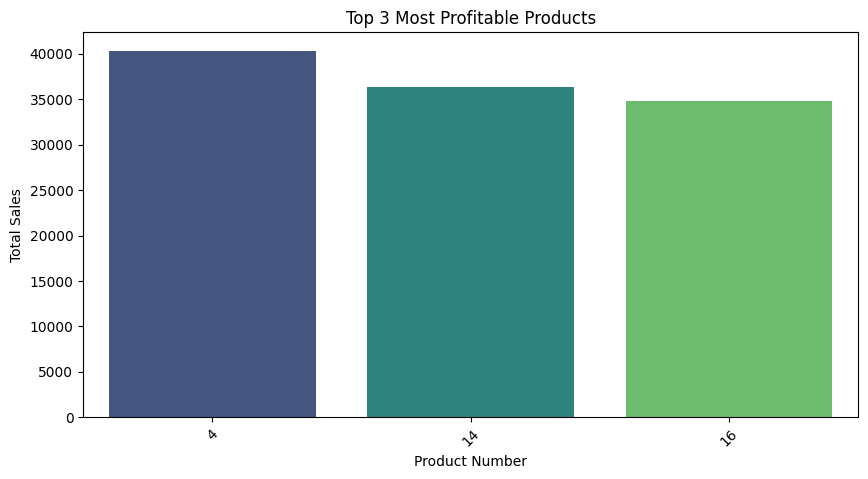

In [16]:
top_products = total_sales_per_product.sort_values(by='TOTAL_PRODUCT_SALES', ascending=False).head(3)
print("Top 3 Most Profitable Products:\n", top_products)

# Visualize top-selling products
plot_bar_chart(top_products, 'PROD_NBR', 'TOTAL_PRODUCT_SALES', 'Top 3 Most Profitable Products', 'Product Number', 'Total Sales')


### Customer Segmentation

In [17]:
# Analyze spending across LIFESTAGE and PREMIUM_CUSTOMER groups
lifestage_spending = customer_analysis.groupby('LIFESTAGE')['TOTAL_SPENDING'].sum().reset_index()
premium_spending = customer_analysis.groupby('PREMIUM_CUSTOMER')['TOTAL_SPENDING'].sum().reset_index()


In [18]:
# Identify the most revenue-contributing segment
most_profitable_segment = lifestage_spending.sort_values(by='TOTAL_SPENDING', ascending=False).head(1)
print("Most Profitable Lifestage Segment:\n", most_profitable_segment)

Most Profitable Lifestage Segment:
                LIFESTAGE  TOTAL_SPENDING
3  OLDER SINGLES/COUPLES       402420.75


/var/folders/q2/mr2wxd253jl7621ph74vbnwr0000gn/T/ipykernel_2426/3974406730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


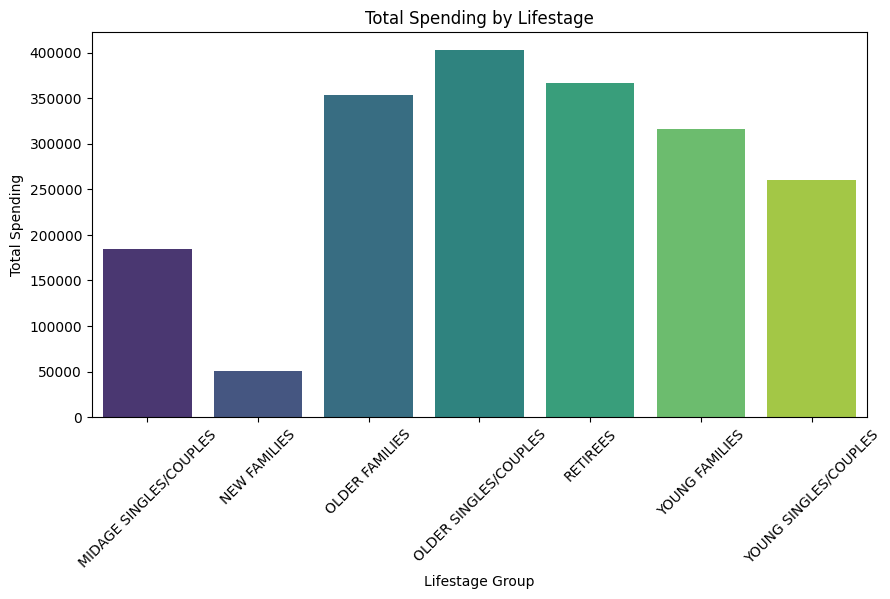

/var/folders/q2/mr2wxd253jl7621ph74vbnwr0000gn/T/ipykernel_2426/3974406730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


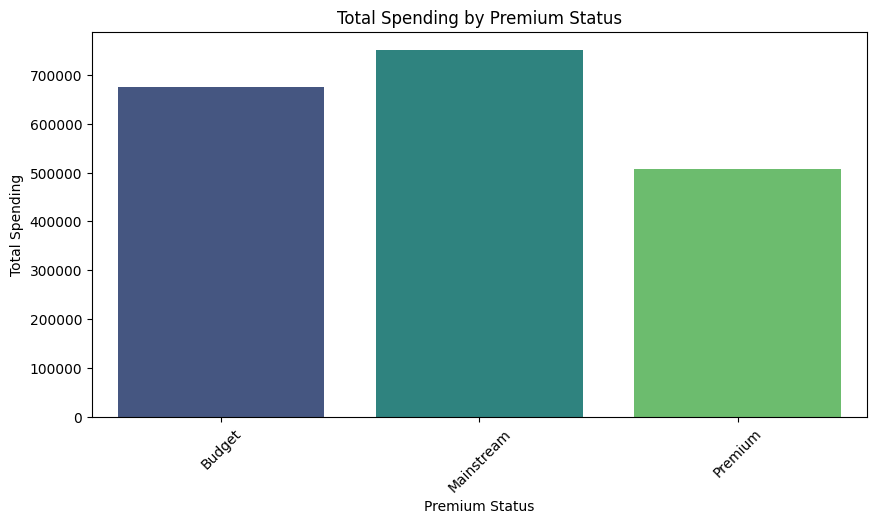

In [19]:
# Visualize customer segmentation
plot_bar_chart(lifestage_spending, 'LIFESTAGE', 'TOTAL_SPENDING', 'Total Spending by Lifestage', 'Lifestage Group', 'Total Spending')
plot_bar_chart(premium_spending, 'PREMIUM_CUSTOMER', 'TOTAL_SPENDING', 'Total Spending by Premium Status', 'Premium Status', 'Total Spending')


### Customer Loyalty Analysis

/var/folders/q2/mr2wxd253jl7621ph74vbnwr0000gn/T/ipykernel_2426/3974406730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


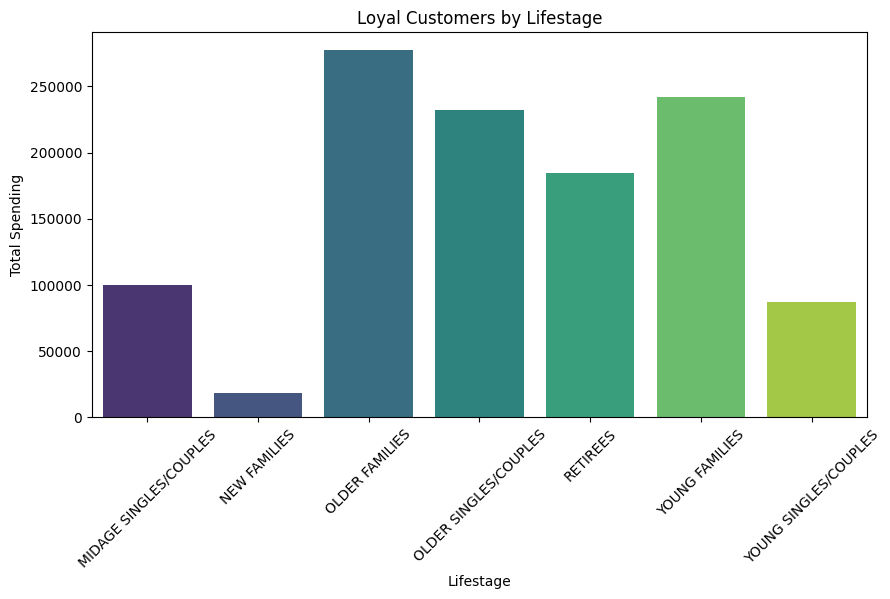

/var/folders/q2/mr2wxd253jl7621ph74vbnwr0000gn/T/ipykernel_2426/3974406730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=data, palette='viridis')


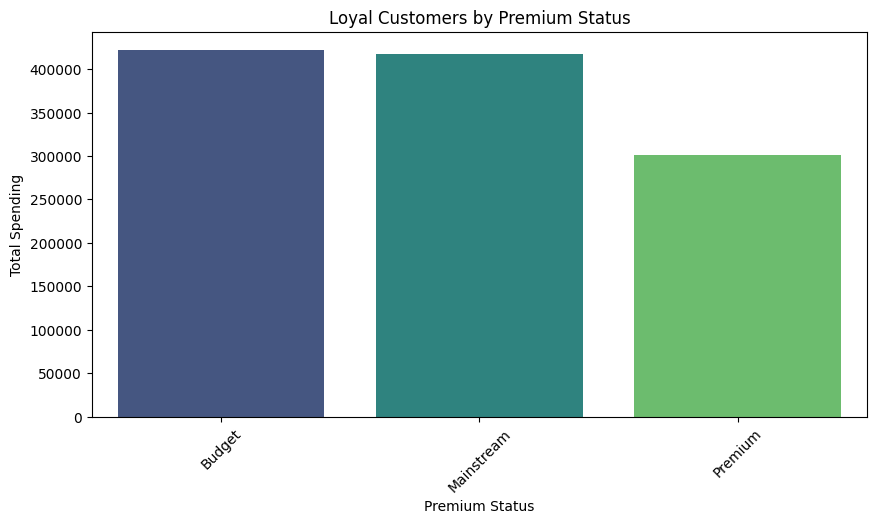

Customer Loyalty Analysis Completed.


In [21]:
# 1. Identify repeat customers
repeat_customers = customer_analysis[customer_analysis['TOTAL_TRANSACTIONS'] > customer_analysis['TOTAL_TRANSACTIONS'].quantile(0.65)]

# 2. Identify high-spending customers
high_spending_customers = customer_analysis[customer_analysis['TOTAL_SPENDING'] > customer_analysis['TOTAL_SPENDING'].quantile(0.65)]

# 3. Identify engaged customers (both high transactions & spending)
loyal_customers = repeat_customers.merge(high_spending_customers, on='LYLTY_CARD_NBR')

# Analyze loyalty by LIFESTAGE and PREMIUM_CUSTOMER
loyalty_by_lifestage = loyal_customers.groupby('LIFESTAGE_x')['TOTAL_SPENDING_x'].sum().reset_index()
loyalty_by_premium = loyal_customers.groupby('PREMIUM_CUSTOMER_x')['TOTAL_SPENDING_x'].sum().reset_index()

# Visualize loyalty segmentation
plot_bar_chart(loyalty_by_lifestage, 'LIFESTAGE_x', 'TOTAL_SPENDING_x', 'Loyal Customers by Lifestage', 'Lifestage', 'Total Spending')
plot_bar_chart(loyalty_by_premium, 'PREMIUM_CUSTOMER_x', 'TOTAL_SPENDING_x', 'Loyal Customers by Premium Status', 'Premium Status', 'Total Spending')

print("Customer Loyalty Analysis Completed.")


In [12]:
loyal_customers

,LYLTY_CARD_NBR,TOTAL_SPENDING_x,TOTAL_TRANSACTIONS_x,AVG_SALES_x,LIFESTAGE_x,PREMIUM_CUSTOMER_x,AVG_BASKET_SIZE_x,TOTAL_SPENDING_y,TOTAL_TRANSACTIONS_y,AVG_SALES_y,LIFESTAGE_y,PREMIUM_CUSTOMER_y,AVG_BASKET_SIZE_y
0,3014,68.0,7,9.714286,YOUNG SINGLES/COUPLES,Mainstream,9.714286,68.0,7,9.714286,YOUNG SINGLES/COUPLES,Mainstream,9.714286
1,3015,53.6,6,8.933333,YOUNG FAMILIES,Budget,8.933333,53.6,6,8.933333,YOUNG FAMILIES,Budget,8.933333
2,3022,80.9,9,8.988889,YOUNG FAMILIES,Budget,8.988889,80.9,9,8.988889,YOUNG FAMILIES,Budget,8.988889
3,3024,49.9,6,8.316667,OLDER SINGLES/COUPLES,Premium,8.316667,49.9,6,8.316667,OLDER SINGLES/COUPLES,Premium,8.316667
4,3031,55.9,6,9.316667,YOUNG SINGLES/COUPLES,Mainstream,9.316667,55.9,6,9.316667,YOUNG SINGLES/COUPLES,Mainstream,9.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15045,272037,57.2,6,9.533333,YOUNG SINGLES/COUPLES,Mainstream,9.533333,57.2,6,9.533333,YOUNG SINGLES/COUPLES,Mainstream,9.533333
15046,272078,53.6,6,8.933333,RETIREES,Budget,8.933333,53.6,6,8.933333,RETIREES,Budget,8.933333
15047,272208,48.1,6,8.016667,OLDER FAMILIES,Premium,8.016667,48.1,6,8.016667,OLDER FAMILIES,Premium,8.016667
15048,272218,58.8,6,9.800000,RETIREES,Budget,9.800000,58.8,6,9.800000,RETIREES,Budget,9.800000


### Statistical Testing

In [13]:
from scipy.stats import chi2_contingency, f_oneway, ttest_ind

# 5.1 Chi-Square Test for Customer Segments
contingency_table = pd.crosstab(customer_analysis['LIFESTAGE'], customer_analysis['PREMIUM_CUSTOMER'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Results: chi2 = {chi2}, p-value = {p}")

# 5.2 Hypothesis Testing for Loyal Customers
# Perform ANOVA to compare spending behavior across LIFESTAGE groups
anova_result = f_oneway(*[group['TOTAL_SPENDING'].values for name, group in customer_analysis.groupby('LIFESTAGE')])
print(f"ANOVA Test for Lifestage Spending: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Perform t-test to compare spending between Budget and Premium customers
budget_spending = customer_analysis[customer_analysis['PREMIUM_CUSTOMER'] == 'Budget']['TOTAL_SPENDING']
premium_spending = customer_analysis[customer_analysis['PREMIUM_CUSTOMER'] == 'Premium']['TOTAL_SPENDING']
ttest_result = ttest_ind(budget_spending, premium_spending, equal_var=False)
print(f"T-Test Results: t-statistic = {ttest_result.statistic}, p-value = {ttest_result.pvalue}")

print("Statistical Testing Completed.")


Chi-Square Test Results: chi2 = 4135.643321543015, p-value = 0.0
ANOVA Test for Lifestage Spending: F-statistic = 1142.4765647682684, p-value = 0.0
T-Test Results: t-statistic = 3.863891077551327, p-value = 0.00011177233777341804
Statistical Testing Completed.
